# **Laptop Price Forecasting💻**

Objective:
The goal of this project is to build a machine learning model to forecast the price of a laptop based on its features. The project demonstrates skills in data processing, data visualization, and machine learning model building.


The project is divided into four main parts:

1. **Data Preprocessing/Feature Engineering:**
   - **Handling Missing Values and Duplicates:** Filling in any null values and removing duplicate columns to clean the dataset.
   - **String Transformation:** Converting noisy string columns into formats that are easier for the model to process.

2. **Exploratory Data Analysis (EDA):**
   - **Visualizations:** Creating plots such as countplots, boxplots, and barplots to analyze data patterns and distributions.
   - **Price Transformation:** Observing that the price distribution is right-skewed, applying a natural logarithm transformation to achieve a more normal distribution, which is beneficial for the machine learning algorithm.

3. **Model Building:**
   - **Model Development:** Building and training several machine learning models namely Linear Regression, Support Vector Regression (SVR), Random Forest, and XGBoost.
   - **Model Evaluation:** Comparing the performance of these models using various evaluation metrics to determine the best-performing model.

4. **Forecasting:**
   - **User Input Interface:** Developing an input page where users can enter their laptop specifications.
   - **Price Prediction:** Using the input data to predict the laptop price based on the trained model.


In [ ]:
import pandas as pd
import matplotlib.pyplot as plt
import seaborn as sns
import numpy as np
import re

### **Data loading**

You can find the data used [here](https://drive.google.com/file/d/18AbkP0XKceCoQuKz4B4Hi8hABilcZar5/view?usp=sharing)

To replicate, download the csv file above and fill in the respective path in the code below.

In [ ]:
path = #Fill in the csv path here
data = pd.read_csv(path, index_col=0)
data.head()

,Company,TypeName,Inches,ScreenResolution,Cpu,Ram,Memory,Gpu,OpSys,Weight,Price_IDR
0,Apple,Ultrabook,13.3,IPS Panel Retina Display 2560x1600,Intel Core i5 2.3GHz,8GB,128GB SSD,Intel Iris Plus Graphics 640,macOS,1.37kg,1.388315e+07
1,Apple,Ultrabook,13.3,1440x900,Intel Core i5 1.8GHz,8GB,128GB Flash Storage,Intel HD Graphics 6000,macOS,1.34kg,9.315679e+06
2,HP,Notebook,15.6,Full HD 1920x1080,Intel Core i5 7200U 2.5GHz,8GB,256GB SSD,Intel HD Graphics 620,No OS,1.86kg,5.958702e+06
3,Apple,Ultrabook,15.4,IPS Panel Retina Display 2880x1800,Intel Core i7 2.7GHz,16GB,512GB SSD,AMD Radeon Pro 455,macOS,1.83kg,2.629549e+07
4,Apple,Ultrabook,13.3,IPS Panel Retina Display 2560x1600,Intel Core i5 3.1GHz,8GB,256GB SSD,Intel Iris Plus Graphics 650,macOS,1.37kg,1.869063e+07


In [ ]:
data.info()

<class 'pandas.core.frame.DataFrame'>
Index: 1303 entries, 0 to 1302
Data columns (total 11 columns):
 #   Column            Non-Null Count  Dtype  
---  ------            --------------  -----  
 0   Company           1303 non-null   object 
 1   TypeName          1303 non-null   object 
 2   Inches            1303 non-null   float64
 3   ScreenResolution  1303 non-null   object 
 4   Cpu               1303 non-null   object 
 5   Ram               1303 non-null   object 
 6   Memory            1303 non-null   object 
 7   Gpu               1303 non-null   object 
 8   OpSys             1303 non-null   object 
 9   Weight            1303 non-null   object 
 10  Price_IDR         1303 non-null   float64
dtypes: float64(2), object(9)
memory usage: 122.2+ KB


### **Data preprocessing**

The first step is to check for null and duplicate values.

In [ ]:
data.isnull().sum()

,0
Company,0
TypeName,0
Inches,0
ScreenResolution,0
Cpu,0
Ram,0
Memory,0
Gpu,0
OpSys,0
Weight,0


In [ ]:
data.duplicated().sum()

29

There are no NULL values, but there are 29 duplicate rows. The next step removes the duplicate row.

In [ ]:
data.drop_duplicates(inplace=True)

**RAM and Weights**

In this section, we address the RAM and Weight columns in the dataset, which contain numeric values accompanied by units (e.g., GB for RAM and kg for Weight). The goal is to remove these units and convert the resulting values to numeric data types.

The approach taken assumes consistency in the units across all entries in each column. If any entry had a different unit, the conversion process using `astype` would raise an error, ensuring data integrity.

In [ ]:
data['Ram'] = data['Ram'].str.replace('GB','').astype('int16')
data['Weight'] = data['Weight'].str.replace('kg','').astype('float64')

**Screen Resolution**

This next section evaluate the ScreenResolution column.

In [ ]:
data['ScreenResolution'].unique()

array(['IPS Panel Retina Display 2560x1600', '1440x900',
       'Full HD 1920x1080', 'IPS Panel Retina Display 2880x1800',
       '1366x768', 'IPS Panel Full HD 1920x1080',
       'IPS Panel Retina Display 2304x1440',
       'IPS Panel Full HD / Touchscreen 1920x1080',
       'Full HD / Touchscreen 1920x1080',
       'Touchscreen / Quad HD+ 3200x1800',
       'IPS Panel Touchscreen 1920x1200', 'Touchscreen 2256x1504',
       'Quad HD+ / Touchscreen 3200x1800', 'IPS Panel 1366x768',
       'IPS Panel 4K Ultra HD / Touchscreen 3840x2160',
       'IPS Panel Full HD 2160x1440',
       '4K Ultra HD / Touchscreen 3840x2160', 'Touchscreen 2560x1440',
       '1600x900', 'IPS Panel 4K Ultra HD 3840x2160',
       '4K Ultra HD 3840x2160', 'Touchscreen 1366x768',
       'IPS Panel Full HD 1366x768', 'IPS Panel 2560x1440',
       'IPS Panel Full HD 2560x1440',
       'IPS Panel Retina Display 2736x1824', 'Touchscreen 2400x1600',
       '2560x1440', 'IPS Panel Quad HD+ 2560x1440',
       'IPS Panel 

The `ScreenResolution` column contains multiple attributes related to the device's display, such as whether it is a touchscreen, the screen category (e.g., Full HD), and the x and y dimensions of the screen. To make these features more accessible for analysis, we perform the following steps:

* Touchscreen Column: This column is derived from the presence of the word "Touchscreen" in the ScreenResolution column. A value of 1 indicates that the screen has touchscreen capabilities, while 0 indicates it does not.

* The remaining details within the ScreenResolution column include the screen category (e.g., Full HD) and the screen dimensions (x and y). We split these into separate columns:
  * Screen_name Column: This column captures the display type or resolution category (e.g., Full HD, Quad HD). Some entries may be None if no category is specified.
  * x_dim Column: This column represents the horizontal pixel count (x-axis).
  * y_dim Column: This column represents the vertical pixel count (y-axis).


In [ ]:
def touchscreen(x):
  if 'Touchscreen' in x:
    return 1
  else:
    return 0

data['Touch_screen'] = data['ScreenResolution'].apply(touchscreen)

# removing Touchscreen and / in the ScreenResolution
data['ScreenResolution'] = data['ScreenResolution'].str.replace('Touchscreen ','').str.replace('/ ','')

In [ ]:
def modify_string(text):
  left, y_dim = text.split('x')
  screen = re.split(r"(?<=[A-Za-z\+])\s(?=\d{2,})", left)
  if len(screen) == 1:
    screen_name = 'None'
    x_dim = screen[0]
  else:
    screen_name = screen[0]
    x_dim = screen[1]
  return screen_name, x_dim, y_dim

data['Temp'] = data['ScreenResolution'].apply(modify_string)
data['Screen_name'] = data['Temp'].apply(lambda x: x[0])
data['X_dim'] = data['Temp'].apply(lambda x: x[1]).astype('int')
data['Y_dim'] = data['Temp'].apply(lambda x: x[2]).astype('int')
data.drop(['ScreenResolution','Temp'], axis=1, inplace=True)

In [ ]:
data['Screen_name'].unique()

array(['IPS Panel Retina Display', 'None', 'Full HD', 'IPS Panel Full HD',
       'Quad HD+', 'IPS Panel', 'IPS Panel 4K Ultra HD', '4K Ultra HD',
       'IPS Panel Quad HD+'], dtype=object)

We can further simplify and classify the screen categories into two general types: IPS (a screen technology) and HD (resolution categories like Ultra HD, HD+). We create two additional binary columns to indicate whether a screen belongs to these categories.


In [ ]:
data['IPS'] = data['Screen_name'].apply(lambda x: 1 if 'IPS' in x else 0)
data['HD'] = data['Screen_name'].apply(lambda x: 1 if 'HD' in x else 0)
data.drop('Screen_name', axis=1, inplace=True)

**CPU**

The dataset contains over 100 distinct CPU types, which introduces significant complexity. However, this level of detail may be redundant for our model since prices among the same type of CPU typically do not vary substantially. To address this, we simplify and categorize the CPU types as follows:


To begin simplifying the CPU categories, we extract the first three words from each CPU type description.

In [ ]:
data['Cpu'].unique()

array(['Intel Core i5 2.3GHz', 'Intel Core i5 1.8GHz',
       'Intel Core i5 7200U 2.5GHz', 'Intel Core i7 2.7GHz',
       'Intel Core i5 3.1GHz', 'AMD A9-Series 9420 3GHz',
       'Intel Core i7 2.2GHz', 'Intel Core i7 8550U 1.8GHz',
       'Intel Core i5 8250U 1.6GHz', 'Intel Core i3 6006U 2GHz',
       'Intel Core i7 2.8GHz', 'Intel Core M m3 1.2GHz',
       'Intel Core i7 7500U 2.7GHz', 'Intel Core i7 2.9GHz',
       'Intel Core i3 7100U 2.4GHz', 'Intel Atom x5-Z8350 1.44GHz',
       'Intel Core i5 7300HQ 2.5GHz', 'AMD E-Series E2-9000e 1.5GHz',
       'Intel Core i5 1.6GHz', 'Intel Core i7 8650U 1.9GHz',
       'Intel Atom x5-Z8300 1.44GHz', 'AMD E-Series E2-6110 1.5GHz',
       'AMD A6-Series 9220 2.5GHz',
       'Intel Celeron Dual Core N3350 1.1GHz',
       'Intel Core i3 7130U 2.7GHz', 'Intel Core i7 7700HQ 2.8GHz',
       'Intel Core i5 2.0GHz', 'AMD Ryzen 1700 3GHz',
       'Intel Pentium Quad Core N4200 1.1GHz',
       'Intel Atom x5-Z8550 1.44GHz',
       'Intel Celeron Du

In [ ]:
def cpu_name(input):
  cpu = ' '.join(input.split()[:3])
  return cpu

data['Cpu'] = data['Cpu'].apply(cpu_name)

In [ ]:
data['Cpu'].unique()

array(['Intel Core i5', 'Intel Core i7', 'AMD A9-Series 9420',
       'Intel Core i3', 'Intel Core M', 'Intel Atom x5-Z8350',
       'AMD E-Series E2-9000e', 'Intel Atom x5-Z8300',
       'AMD E-Series E2-6110', 'AMD A6-Series 9220', 'Intel Celeron Dual',
       'AMD Ryzen 1700', 'Intel Pentium Quad', 'Intel Atom x5-Z8550',
       'AMD FX 9830P', 'AMD E-Series 6110', 'Intel Xeon E3-1505M',
       'AMD E-Series 9000e', 'AMD A10-Series A10-9620P',
       'AMD A6-Series A6-9220', 'AMD A10-Series 9600P',
       'AMD A8-Series 7410', 'AMD A12-Series 9720P', 'Intel Celeron Quad',
       'AMD Ryzen 1600', 'AMD A10-Series 9620P', 'AMD E-Series 7110',
       'AMD A9-Series A9-9420', 'Intel Xeon E3-1535M',
       'AMD E-Series E2-9000', 'AMD A6-Series 7310', 'Intel Atom Z8350',
       'Intel Pentium Dual', 'AMD A12-Series 9700P', 'AMD A4-Series 7210',
       'AMD FX 8800P', 'Intel Atom X5-Z8350', 'Samsung Cortex A72&A53',
       'AMD E-Series 9000', 'AMD A9-Series 9410'], dtype=object)

After extracting the initial words, we observe that there are still numerous CPU types. To further simplify, we categorize them based on the following rules:

* Intel Core Series: For CPUs labeled as Intel Core (e.g., Intel Core i5, Intel Core i7), we retain the full three-word description, as the differences between models like i5 and i7 are significant.
* Other Intel CPUs: For Intel CPUs that are not part of the Core series (e.g., Intel Pentium, Intel Celeron), we simplify by keeping only the first two words.
* Other CPU Series (e.g., AMD E-Series): Similarly, for CPUs from other manufacturers (e.g., AMD E-Series), we retain only the first two words.


In [ ]:
def cpu_name2(input):
  if 'Intel' in input:
    if 'Core' not in input:
      new_name = ' '.join(input.split()[:2])
    else:
      new_name = input
  else:
    new_name = ' '.join(input.split()[:2])
  return new_name

In [ ]:
data['Cpu'] = data['Cpu'].apply(cpu_name2)
data['Cpu'].unique()

array(['Intel Core i5', 'Intel Core i7', 'AMD A9-Series', 'Intel Core i3',
       'Intel Core M', 'Intel Atom', 'AMD E-Series', 'AMD A6-Series',
       'Intel Celeron', 'AMD Ryzen', 'Intel Pentium', 'AMD FX',
       'Intel Xeon', 'AMD A10-Series', 'AMD A8-Series', 'AMD A12-Series',
       'AMD A4-Series', 'Samsung Cortex'], dtype=object)

The resulting CPU column reduces the complexity of the original CPU type while retaining the essential distinctions that may impact pricing and performance

**GPU**

Similar to the CPU column, the GPU column contains numerous unique values, adding complexity to the dataset. To streamline this, we apply a similar simplification strategy as used for the CPU types. We extract the first two words from each GPU type description. This approach helps to reduce the number of unique GPU entries while retaining the essential details.


In [ ]:
data['Gpu'].unique()

array(['Intel Iris Plus Graphics 640', 'Intel HD Graphics 6000',
       'Intel HD Graphics 620', 'AMD Radeon Pro 455',
       'Intel Iris Plus Graphics 650', 'AMD Radeon R5',
       'Intel Iris Pro Graphics', 'Nvidia GeForce MX150',
       'Intel UHD Graphics 620', 'Intel HD Graphics 520',
       'AMD Radeon Pro 555', 'AMD Radeon R5 M430',
       'Intel HD Graphics 615', 'AMD Radeon Pro 560',
       'Nvidia GeForce 940MX', 'Intel HD Graphics 400',
       'Nvidia GeForce GTX 1050', 'AMD Radeon R2', 'AMD Radeon 530',
       'Nvidia GeForce 930MX', 'Intel HD Graphics',
       'Intel HD Graphics 500', 'Nvidia GeForce 930MX ',
       'Nvidia GeForce GTX 1060', 'Nvidia GeForce 150MX',
       'Intel Iris Graphics 540', 'AMD Radeon RX 580',
       'Nvidia GeForce 920MX', 'AMD Radeon R4 Graphics', 'AMD Radeon 520',
       'Nvidia GeForce GTX 1070', 'Nvidia GeForce GTX 1050 Ti',
       'Nvidia GeForce MX130', 'AMD R4 Graphics',
       'Nvidia GeForce GTX 940MX', 'AMD Radeon RX 560',
       'Nvid

In [ ]:
def gpu_name(input):
  gpu = ' '.join(input.split()[:2])
  return gpu

data['Gpu'] = data['Gpu'].apply(gpu_name)

**Memory**

The Memory column in the dataset contains information about the types and sizes of storage available in each laptop, with possible storage types including SSD, HDD, Flash Storage, and Hybrid. To standardize and structure this information for analysis, we perform the following steps:

1. Standardizing Memory Units

  First, we ensure that all memory sizes are represented in gigabytes (GB). This involves:
  - Removing any `.0` from memory sizes.
  - Converting terabytes (TB) to gigabytes (GB) by multiplying the value by 1000.
  - Removing any remaining `GB` suffixes.

2. Creating a Memory Array
  
  Next, we create a function memory_array that parses the cleaned memory string and stores the sizes in a list corresponding to different memory types:
  * The first position indicates the size of SSD.
  * The second position indicates the size of HDD.
  * The third position indicates the size of Flash Storage.
  * The fourth position indicates the size of Hybrid storage.

3. Converting Memory Array to Separate Columns
  We then convert the memory_array into independent columns for each storage type. If the value is not 0, it indicates the size of the respective memory type.

In [ ]:
data['Memory'].unique()

array(['128GB SSD', '128GB Flash Storage', '256GB SSD', '512GB SSD',
       '500GB HDD', '256GB Flash Storage', '1TB HDD',
       '32GB Flash Storage', '128GB SSD +  1TB HDD',
       '256GB SSD +  256GB SSD', '64GB Flash Storage',
       '256GB SSD +  1TB HDD', '256GB SSD +  2TB HDD', '32GB SSD',
       '2TB HDD', '64GB SSD', '1.0TB Hybrid', '512GB SSD +  1TB HDD',
       '1TB SSD', '256GB SSD +  500GB HDD', '128GB SSD +  2TB HDD',
       '512GB SSD +  512GB SSD', '16GB SSD', '16GB Flash Storage',
       '512GB SSD +  256GB SSD', '512GB SSD +  2TB HDD',
       '64GB Flash Storage +  1TB HDD', '180GB SSD', '1TB HDD +  1TB HDD',
       '32GB HDD', '1TB SSD +  1TB HDD', '512GB Flash Storage',
       '128GB HDD', '240GB SSD', '8GB SSD', '508GB Hybrid', '1.0TB HDD',
       '512GB SSD +  1.0TB Hybrid', '256GB SSD +  1.0TB Hybrid'],
      dtype=object)

In [ ]:
data['Memory'] = data['Memory'].str.replace('.0', '')
data['Memory'] = data['Memory'].str.replace('GB', '')
data['Memory'] = data['Memory'].str.replace('TB', '000')

In [ ]:
def memory_array(input):
  arr = np.array([0,0,0,0])
  s = re.split(r'\s+\+\s+' , input)

  if len(s) == 1:
    val = re.split(r'(?<=\d)\s(?=[A-Z])', s[0])[0]
    if 'SSD' in input:
      arr[0] = val
    elif 'HDD' in input:
      arr[1] = val
    elif 'Flash Storage' in input:
      arr[2] = val
    elif 'Hybrid' in input:
      arr[3] = val

  elif len(s) == 2:
    val1 = re.split(r'(?<=\d)\s(?=[A-Z])', s[0])[0]
    val2 = re.split(r'(?<=\d)\s(?=[A-Z])', s[1])[0]
    if 'SSD' in s[0]:
      arr[0] = val1
    elif 'HDD' in s[0]:
      arr[1] = val1
    elif 'Flash Storage' in s[0]:
      arr[2] = val1
    elif 'Hybrid' in s[0]:
      arr[3] = val1
    if 'SSD' in s[1]:
      arr[0] = val2
    elif 'HDD' in s[1]:
      arr[1] = val2
    elif 'Flash Storage' in s[1]:
      arr[2] = val2
    elif 'Hybrid' in s[1]:
      arr[3] = val2

  return arr

While the function may not be the most efficient, it performs adequately given the relatively small number of distinct data points (four types of memory). For larger datasets or more complex scenarios, optimizations might be considered. However, for the current dataset, this approach provides satisfactory performance and clarity.

In [ ]:
data['Temp'] = data['Memory'].apply(memory_array)

In [ ]:
data['SSD'] = data['Temp'].apply(lambda x: x[0]).astype('int')
data['HDD'] = data['Temp'].apply(lambda x: x[1]).astype('int')
data['Flash'] = data['Temp'].apply(lambda x: x[2]).astype('int')
data['Hybrid'] = data['Temp'].apply(lambda x: x[3]).astype('int')
data.drop(['Memory','Temp'], axis=1, inplace=True)

We can find the final data after processing below.

In [ ]:
data.head()

,Company,TypeName,Inches,Cpu,Ram,Gpu,OpSys,Weight,Price_IDR,Touch_screen,X_dim,Y_dim,IPS,HD,SSD,HDD,Flash,Hybrid
0,Apple,Ultrabook,13.3,Intel Core i5,8,Intel Iris,macOS,1.37,1.388315e+07,0,2560,1600,1,0,128,0,0,0
1,Apple,Ultrabook,13.3,Intel Core i5,8,Intel HD,macOS,1.34,9.315679e+06,0,1440,900,0,0,0,0,128,0
2,HP,Notebook,15.6,Intel Core i5,8,Intel HD,No OS,1.86,5.958702e+06,0,1920,1080,0,1,256,0,0,0
3,Apple,Ultrabook,15.4,Intel Core i7,16,AMD Radeon,macOS,1.83,2.629549e+07,0,2880,1800,1,0,512,0,0,0
4,Apple,Ultrabook,13.3,Intel Core i5,8,Intel Iris,macOS,1.37,1.869063e+07,0,2560,1600,1,0,256,0,0,0


### **Exploratory Data Analysis**

EDA is important to understand the data further, looking into each features of the dataset into more details.

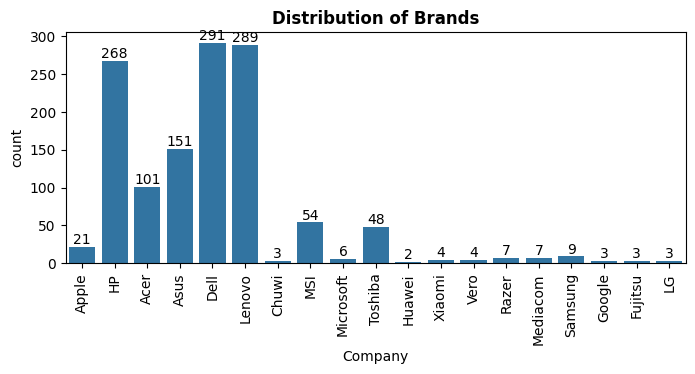

In [ ]:
plt.figure(figsize=(8, 3))
ax = sns.countplot(x=data['Company'])
ax.bar_label(ax.containers[0])
plt.title('Distribution of Brands', fontweight = 'bold')
plt.xticks(rotation=90)
plt.show()

**Note:** The dataset includes numerous brands with very few sample points. When interpreting the model and making forecasts, it is important to consider the impact of these small sample sizes.

One potential approach to address this issue is to remove data from brands with fewer than 10 samples to ensure that the model is not overly influenced by these minor categories. However, for the purposes of this analysis, we will retain all brands in the dataset. This decision is made to preserve the full scope of the data and evaluate the model's performance comprehensively. Future steps may involve assessing whether excluding these brands could improve model accuracy or stability.


**Price Distribution per Brand**

To understand the price distribution for each brand, we examined the dataset and plotted the price ranges across different brands. The following observations were made:

1. **Wide Range of Prices:**
  
  There is no clear pattern in the price distributions for different brands. Most brands exhibit a broad range of prices, indicating variability within each brand.

2. **Impact of Sample Size:**

  The price distribution plots show that brands with more sample points tend to have more pronounced outliers. This suggests that the number of samples can influence the apparent variability and representation of price data.

3. **Plot Representation:**

  The plot may be less representative due to the varying number of sample points for each brand. Brands with fewer samples might not show the full extent of their price range, while brands with more samples might exhibit more outliers and variability.

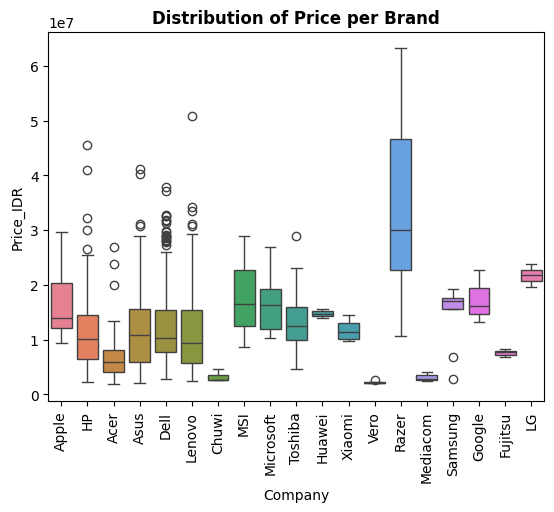

In [ ]:
sns.boxplot(x='Company', y='Price_IDR', data=data, hue='Company')
plt.title('Distribution of Price per Brand', fontweight = 'bold')
plt.xticks(rotation=90)
plt.show()

Next, we examined the distribution of CPU and GPU types in relation to the price of the laptops. The following observations were made:

1. **CPU Price Distribution:**
   - The price distribution for each CPU type is generally clustered around its mean. The distribution for most CPU types is relatively consistent, with the notable exception of Intel Xeon, which shows some variation.
   - This observation supports the earlier decision to process CPU specifications by retaining the first two or three words. For example, differentiating between Intel Core i5 and i7 proves useful, as their price distributions are notably different. This confirms that keeping these distinctions, rather than further grouping all Intel Core processors, is appropriate.

2. **GPU Price Distribution:**
   - Similarly, the distribution of prices across different GPU types was analyzed. The results help understand how different GPUs affect pricing and whether additional grouping or distinctions might be necessary.

In summary, the analysis of CPU and GPU distributions relative to price reaffirms the effectiveness of the earlier data processing steps.

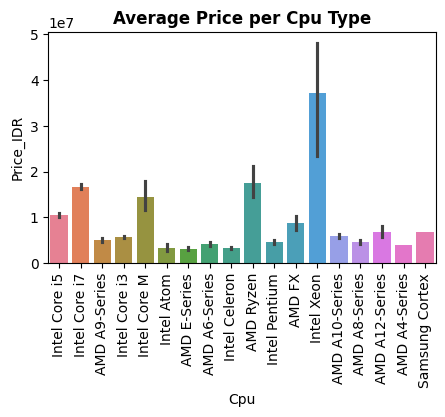

In [ ]:
plt.figure(figsize=(5, 3))
sns.barplot(x='Cpu', y='Price_IDR', data=data, hue='Cpu')
plt.title('Average Price per Cpu Type', fontweight = 'bold')
plt.xticks(rotation=90)
plt.show()

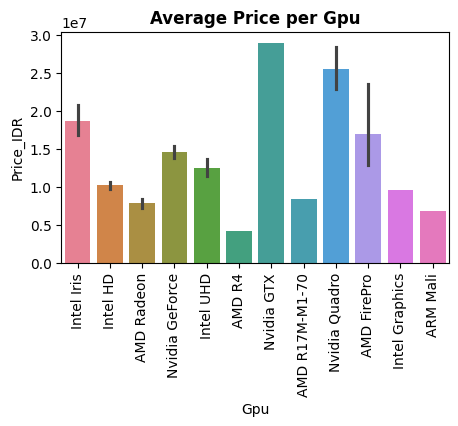

In [ ]:
plt.figure(figsize=(5, 3))
sns.barplot(x='Gpu', y='Price_IDR', data=data, hue='Gpu')
plt.title('Average Price per Gpu', fontweight = 'bold')
plt.xticks(rotation=90)
plt.show()

As expected, the following analysis shows that the price of a laptop generally increases with higher RAM capacity.

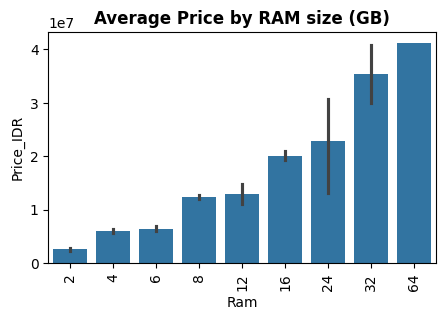

In [ ]:
plt.figure(figsize=(5, 3))
sns.barplot(x='Ram', y='Price_IDR', data=data)
plt.title('Average Price by RAM size (GB)', fontweight = 'bold')
plt.xticks(rotation=90)
plt.show()

Finally, we analyzed the distribution of laptop prices. The following steps were taken to improve the distribution and prepare the data for modeling:

1. **Price Distribution Analysis:**
   
   The initial analysis of the price distribution revealed that it is right-skewed

2. **Log Transformation:**
   
   To address the skewness and normalize the distribution, a logarithmic transformation was applied to the price data. This transformation helps to:
     - Make the distribution more normally distributed
     - Reduce the magnitude of price values, which can be beneficial for modeling purposes

3. **Column Update:**
  - The original `Price_IDR` column, which contained the raw price data, was dropped.
   - The transformed price data was placed into a new `Price` column.

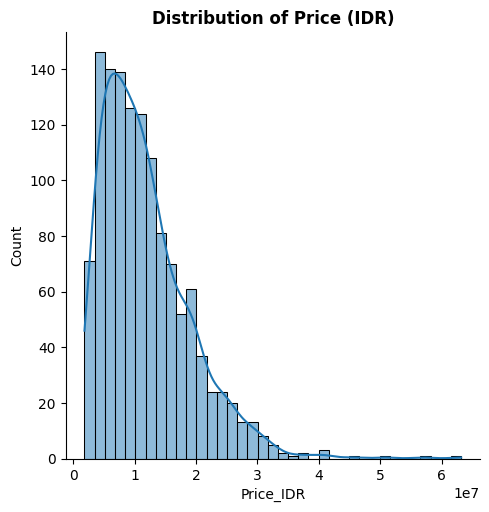

In [ ]:
sns.displot(x=data['Price_IDR'], kde=True)
plt.title('Distribution of Price (IDR)', fontweight = 'bold')
plt.show()

In [ ]:
data['Price'] = np.log(data['Price_IDR'])
data.drop('Price_IDR', axis=1, inplace=True)

The transformed `Price` column now reflects a more normal distribution, with reduced skewness and smaller values, making it better suited for subsequent modeling and analysis.

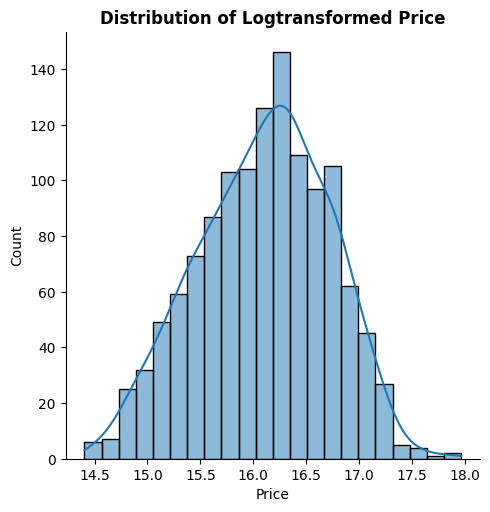

In [ ]:
sns.displot(x=data['Price'], kde=True)
plt.title('Distribution of Logtransformed Price', fontweight = 'bold')
plt.show()

## **Model**

In [ ]:
from sklearn.model_selection import train_test_split
from sklearn.preprocessing import OneHotEncoder
from sklearn.pipeline import Pipeline
from sklearn.compose import ColumnTransformer
from sklearn.linear_model import LinearRegression
from sklearn.ensemble import RandomForestRegressor
from sklearn.svm import SVR
from xgboost import XGBRegressor
from sklearn.metrics import r2_score, mean_absolute_error, mean_squared_error

To prepare the data for modeling, we need to separate the features (input variables) from the target variable (label). In this case, the target variable is the `Price`, and the features include all other relevant columns in the dataset.
   - The `X` dataframe consists of all columns that will be used as input features for the model
   - The `y` dataframe contains the target variable, which in this case is `Price`. This column represents the value we aim to predict using the features in `X`

In [ ]:
df = data.copy()
X = df.drop(['Price'], axis=1)
y = df['Price']

To evaluate the performance of our model, we need to split the data into training and testing subsets. The dataset is split into training and testing sets using an 80-20 split ratio. Also, to ensure reproducibility of the results, the `random_state` parameter is set to a fixed value.

In [ ]:
X_train, X_test, y_train, y_test = train_test_split(X, y, test_size=0.15, random_state=42)

The model pipeline will consist of two main components:

1. **One-Hot Encoding:**
   - Categorical columns in the dataset will be encoded using one-hot encoding. This transformation converts categorical variables into a format that can be provided to machine learning algorithms.

2. **Machine Learning Models:**
   - We evaluate the following four machine learning models: Linear Regression, Support Vector Regression, Random Forest, and XGBoost

The performance of each model will be evaluated using the following metrics:
  
  - **R2-Score:** Indicates how well the model explains the variability of the target variable. A score close to 1 signifies a good fit.
  - **Mean Squared Error (MSE):** Measures the average squared difference between the predicted and actual values. Lower values indicate better model performance.
  - **Mean Absolute Error (MAE):** Measures the average absolute difference between predicted and actual values. Lower values are preferred for better accuracy.


*Note: The above approach represents a basic evaluation framework. More comprehensive analysis techniques, such as hyperparameter tuning, statistical significance tests, and cross-validation, can further refine model selection and improve performance.*


In [ ]:
onehot_enc = ColumnTransformer(transformers=[('onehot', OneHotEncoder(sparse_output = False), ['Company','TypeName','Cpu','Gpu','OpSys'])] , remainder='passthrough')

lr = LinearRegression()
svr = SVR(kernel='rbf', C=100)
rf = RandomForestRegressor(n_estimators=100)
xgb = XGBRegressor(learning_rate=0.2)

model = [lr, svr, rf, xgb]
model_name = ['Linear regression', 'Support vector regression', 'Random forest', 'XGBoost']

In [ ]:
tab = []
pipe = [0,0,0,0]

for id, mod in enumerate(model):
  pipe[id] = Pipeline([('step1', onehot_enc), ('step2', mod)])
  pipe[id].fit(X_train, y_train)
  y_pred = pipe[id].predict(X_test)
  r2 = r2_score(y_test, y_pred)
  mse = mean_squared_error(y_test, y_pred)
  mae = mean_absolute_error(y_test, y_pred)
  tab.append([r2, mse, mae])

pd.DataFrame(np.array(tab).T, columns=model_name, index=['R2', 'MSE', 'MAE'])

,Linear regression,Support vector regression,Random forest,XGBoost
R2,0.849536,0.647973,0.882620,0.908430
MSE,0.057148,0.133704,0.044582,0.034779
MAE,0.189810,0.283407,0.158541,0.141141


After evaluating the performance of the four machine learning models, XGBoost gives the best result across the 3 metrics. Based on these findings, XGBoost will be selected as the final model for forecasting.

In [ ]:
final_model = pipe[3]

### **Forecasting**

To utilize the XGBoost model for forecasting, a simple "application" has been developed to input laptop specifications. The application allows users to enter various attributes of the laptop, and the model provides a price prediction based on these inputs.

Application Design:
  - Users can fill in the specifications of the laptop, including features such as RAM, CPU type, GPU type, and screen resolution.
  - It is assumed that the input format will always be correct and consistent with the expected format. As such, no notifications or error handling for incorrect formats are included in this version of the app.

An alternative approach involves formatting the input data to match the initial CSV data format. The input specifications would be processed using the same data processing steps applied to the original dataset.

To ensure that the input data for forecasting aligns with the feature columns used in the model, we need to retrieve all column names from the dataset, excluding the `Price` column. The following code achieves this:

In [ ]:
col_title = np.array(data.columns)
col_title = np.delete(col_title, np.where(col_title == 'Price'))
col_title

array(['Company', 'TypeName', 'Inches', 'Cpu', 'Ram', 'Gpu', 'OpSys',
       'Weight', 'Touch_screen', 'X_dim', 'Y_dim', 'IPS', 'HD', 'SSD',
       'HDD', 'Flash', 'Hybrid'], dtype=object)

<font color='orange'> **Run the following code to input the specifications.** </font>

In [ ]:
arr = []

for idx, col_name in enumerate(col_title):
  if col_name in ['Company', 'TypeName', 'Cpu', 'Gpu', 'OpSys']:
    for i, option in enumerate(data[col_name].unique()):
      print(str(i) + '.' + option, end=' ')
      if i!=0 and i % 7 == 0:
        print('\n')
    print('\n')
    val = input(col_name + ' (fill in the number): ')
    arr.append(data[col_name].unique()[int(val)])

  elif col_name in ['Touch_screen', 'IPS', 'HD']:
    val = input(col_name + ' (Yes/No): ')
    if val.capitalize() == 'Yes':
      arr.append(1)
    else:
      arr.append(0)

  else:
    val = float(input(col_name + ' : '))
    arr.append(val)

  print('\n')

0.Apple 1.HP 2.Acer 3.Asus 4.Dell 5.Lenovo 6.Chuwi 7.MSI 

8.Microsoft 9.Toshiba 10.Huawei 11.Xiaomi 12.Vero 13.Razer 14.Mediacom 

15.Samsung 16.Google 17.Fujitsu 18.LG 

Company (fill in the number): 4


0.Ultrabook 1.Notebook 2.Netbook 3.Gaming 4.2 in 1 Convertible 5.Workstation 

TypeName (fill in the number): 1


Inches : 17.3


0.Intel Core i5 1.Intel Core i7 2.AMD A9-Series 3.Intel Core i3 4.Intel Core M 5.Intel Atom 6.AMD E-Series 7.AMD A6-Series 

8.Intel Celeron 9.AMD Ryzen 10.Intel Pentium 11.AMD FX 12.Intel Xeon 13.AMD A10-Series 14.AMD A8-Series 

15.AMD A12-Series 16.AMD A4-Series 17.Samsung Cortex 

Cpu (fill in the number): 1


Ram : 16


0.Intel Iris 1.Intel HD 2.AMD Radeon 3.Nvidia GeForce 4.Intel UHD 5.AMD R4 6.Nvidia GTX 7.AMD R17M-M1-70 

8.Nvidia Quadro 9.AMD FirePro 10.Intel Graphics 11.ARM Mali 

Gpu (fill in the number): 2


0.macOS 1.No OS 2.Windows 10 3.Mac OS X 4.Linux 5.Android 6.Windows 10 S 7.Chrome OS 

8.Windows 7 

OpSys (fill in the number): 4


Weigh

If you prefer not to use the input application for forecasting, you can use the following ready-made sample data. This allows you to evaluate the model's performance with predefined inputs and ensure that the forecasting process works correctly. Modify the following sample data as needed.

In [ ]:
arr = ['Dell', 'Notebook', 17.3, 'Intel Core i7', 16.0, 'AMD Radeon', 'Linux', 2.0, 0, 1920, 1080, 0, 1, 512, 0, 0, 0]

To help with the forecasting process, a function has been created that takes input data (in terms of array), converts the input data into a dataframe that matches the format used by the model, makes a prediction based on the XGBoost model, and applies the inverse of the log transformation (exponential) to convert the predicted value back to its original scale in IDR (Indonesian Rupiah).

In [ ]:
def forecast(arr, pipe=pipe):
  forecast_df = pd.DataFrame([arr], columns=col_title.tolist())
  forecasted_price = pipe.predict(forecast_df)
  forecasted_price_idr = np.exp(forecasted_price)
  print('Forecasted price: IDR', forecasted_price_idr[0])

forecast(arr, final_model)

Forecasted price: IDR 11243085.0
